<a href="https://colab.research.google.com/github/harish0624/MACHINE-LEARNING/blob/main/EX8b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, roc_curve, confusion_matrix, classification_report
        )


In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42, stratify=y
      )



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
y_pred_train = np.full(y_train.shape, np.mean(y_train))
y_pred_test = np.full(y_test.shape, np.mean(y_train))


In [ ]:
n_estimators = 100
learning_rate = 0.1


In [ ]:
for i in range(n_estimators):
    residuals = y_train - y_pred_train

    tree = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree.fit(X_train, residuals)

    update = tree.predict(X_train)
    update_test = tree.predict(X_test)

    y_pred_train += learning_rate * update
    y_pred_test += learning_rate * update_test

    if (i + 1) % 10 == 0:
        loss = np.mean((y_train - y_pred_train) ** 2)
        print(f"Iteration {i+1}/{n_estimators} - Training Loss: {loss:.4f}")

Iteration 10/100 - Training Loss: 0.0361
Iteration 20/100 - Training Loss: 0.0122
Iteration 30/100 - Training Loss: 0.0069
Iteration 40/100 - Training Loss: 0.0041
Iteration 50/100 - Training Loss: 0.0029
Iteration 60/100 - Training Loss: 0.0023
Iteration 70/100 - Training Loss: 0.0018
Iteration 80/100 - Training Loss: 0.0015
Iteration 90/100 - Training Loss: 0.0012
Iteration 100/100 - Training Loss: 0.0010


In [ ]:
 update = tree.predict(X_train)
 update_test = tree.predict(X_test)


In [ ]:
   y_pred_train += learning_rate * update
   y_pred_test += learning_rate * update_test


In [ ]:
 if (i + 1) % 10 == 0:
    loss = np.mean((y_train - y_pred_train) ** 2)
    print(f"Iteration {i+1}/{n_estimators} - Training Loss: {loss:.4f}")

Iteration 100/100 - Training Loss: 0.1934


In [ ]:
y_pred_binary = (y_pred_test >= 0.5).astype(int)


In [ ]:
acc = accuracy_score(y_test, y_pred_binary)
prec = precision_score(y_test, y_pred_binary)
rec = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_binary)


In [ ]:
print("\n=== Model Evaluation ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))



=== Model Evaluation ===
Accuracy:  0.6316
Precision: 0.6316
Recall:    1.0000
F1 Score:  0.7742
ROC AUC:   0.9446

Confusion Matrix:
 [[ 0 42]
 [ 0 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


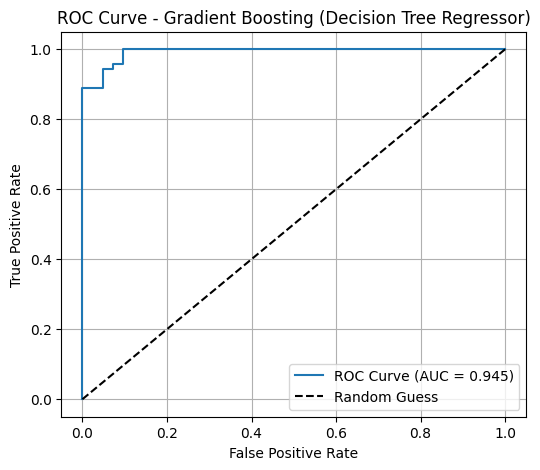

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting (Decision Tree Regressor)")
plt.legend()
plt.grid(True)
plt.show()